In [17]:
import pandas as pd
import locale

In [18]:
df = pd.read_csv('data/df_analise.csv').set_index('Data')
df

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Data,,,,,,,
fev/2010,-3.572001,1.683435,0.78,1.18,1.09,1.08,0.70
mar/2010,-1.411957,5.817783,0.52,0.94,0.63,1.10,0.71
abr/2010,-2.909296,-4.038538,0.57,0.77,0.72,0.63,0.73
mai/2010,4.957478,-6.638531,0.43,1.19,1.57,1.11,0.43
jun/2010,-1.295192,-3.348296,0.00,0.85,0.34,1.30,-0.11
...,...,...,...,...,...,...,...
ago/2024,0.295836,6.542788,-0.02,0.29,0.12,0.72,-0.14
set/2024,-3.456118,-3.079321,0.44,0.62,1.03,0.18,0.48
out/2024,6.057206,-1.595406,0.56,1.52,1.54,1.34,0.61


In [19]:
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
df.index = pd.to_datetime(df.index, format='%b/%Y')

In [20]:
stats = df.diff().agg(['mean', 'median', 'std', 'min', 'max'])
stats

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
mean,0.035388,-0.033531,-0.001461,-0.001348,-0.001236,0.000337,-0.001236
median,-0.221810,-0.255193,0.030000,-0.030000,-0.020000,0.010000,0.010000
std,6.478152,8.356145,0.333085,0.741501,0.798781,0.746650,0.361862
min,-22.896002,-21.480200,-1.350000,-3.500000,-3.290000,-2.380000,-1.220000
max,16.844525,40.156375,0.880000,2.590000,2.150000,1.930000,1.000000


In [21]:
from scipy.stats import skew, kurtosis

skewness_kurtosis = df.apply(lambda x: pd.Series({'skewness': skew(x), 'kurtosis': kurtosis(x)}))
skewness_kurtosis

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
skewness,0.528623,-0.436985,0.153562,0.841621,0.648856,0.691402,0.369378
kurtosis,0.782802,2.550987,0.642451,2.936256,1.967659,2.295877,0.508788


In [22]:
# Filtra IPCA do ano desejado
ano = 2010
ipca_ano = df.loc[df.index.year == ano, 'IPCA']

# Calcula inflação acumulada
fatores = (1 + ipca_ano / 100)
inflacao_anual = (fatores.prod() - 1) * 100

print(f'Inflação acumulada de {ano}: {inflacao_anual:.2f}%')

Inflação acumulada de 2010: 5.12%


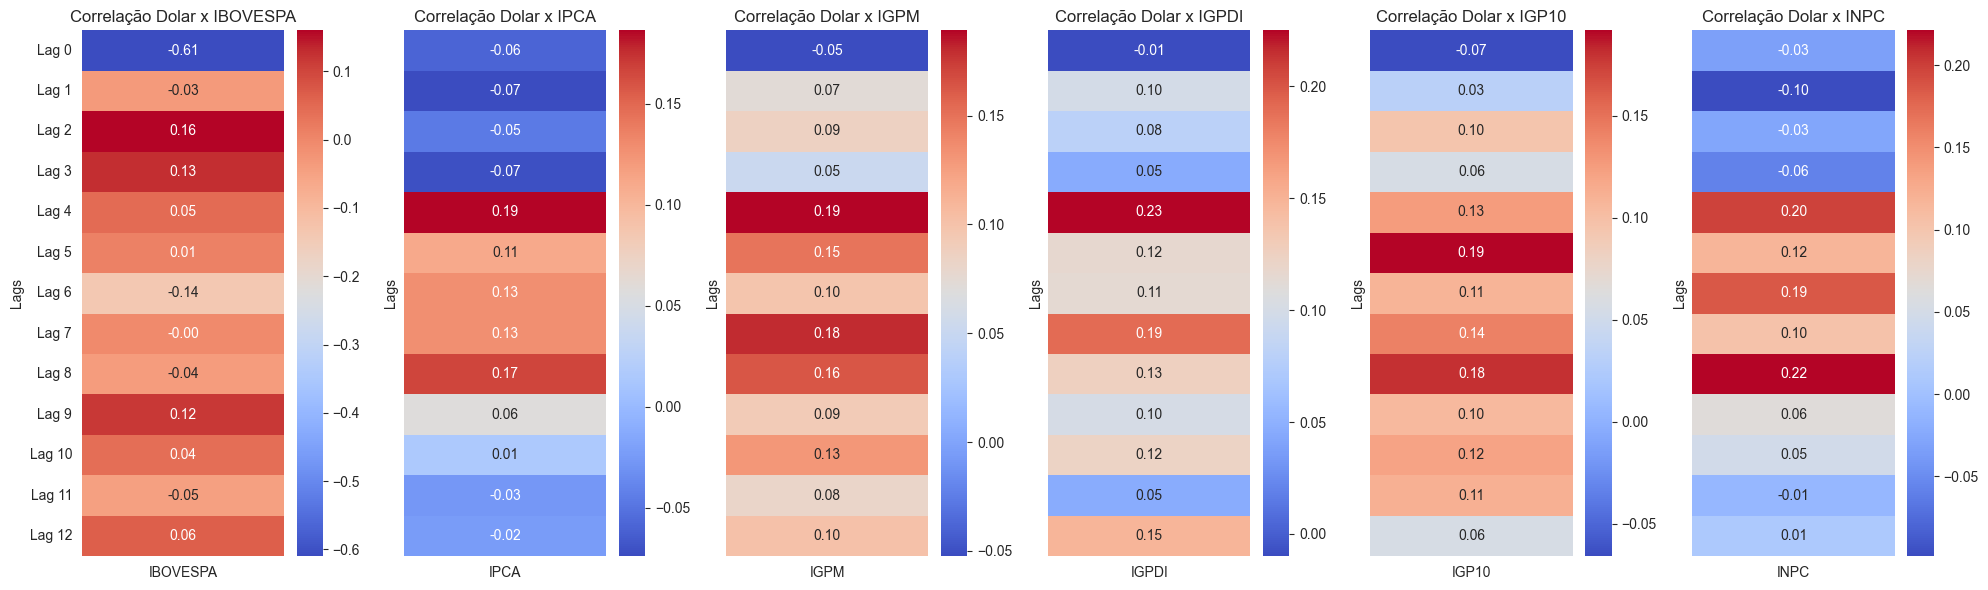

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converte o índice para datetime, caso não esteja
df.index = pd.to_datetime(df.index, format='%b/%Y')

# Calcula a correlação com lags de 0 a 12 para Dolar e todas as outras variáveis
maxlag = 12
lags = range(0, maxlag + 1)
correlations = {f'Lag {lag}': {col: df['Dolar'].shift(lag).corr(df[col]) for col in df.columns if col != 'Dolar'} for lag in lags}

# Converte as correlações em um DataFrame
correlation_df = pd.DataFrame(correlations).T

# Plota os heatmaps lado a lado
fig, axes = plt.subplots(1, len(df.columns) - 1, figsize=(20, maxlag / 2), sharey=True)
for i, col in enumerate(df.columns):
    if col != 'Dolar':
        sns.heatmap(correlation_df[[col]], annot=True, cmap='coolwarm', cbar=True, fmt=".2f", ax=axes[i-1])
        axes[i-1].set_title(f'Correlação Dolar x {col}')
        axes[i-1].set_ylabel('Lags')

plt.tight_layout()
plt.show()

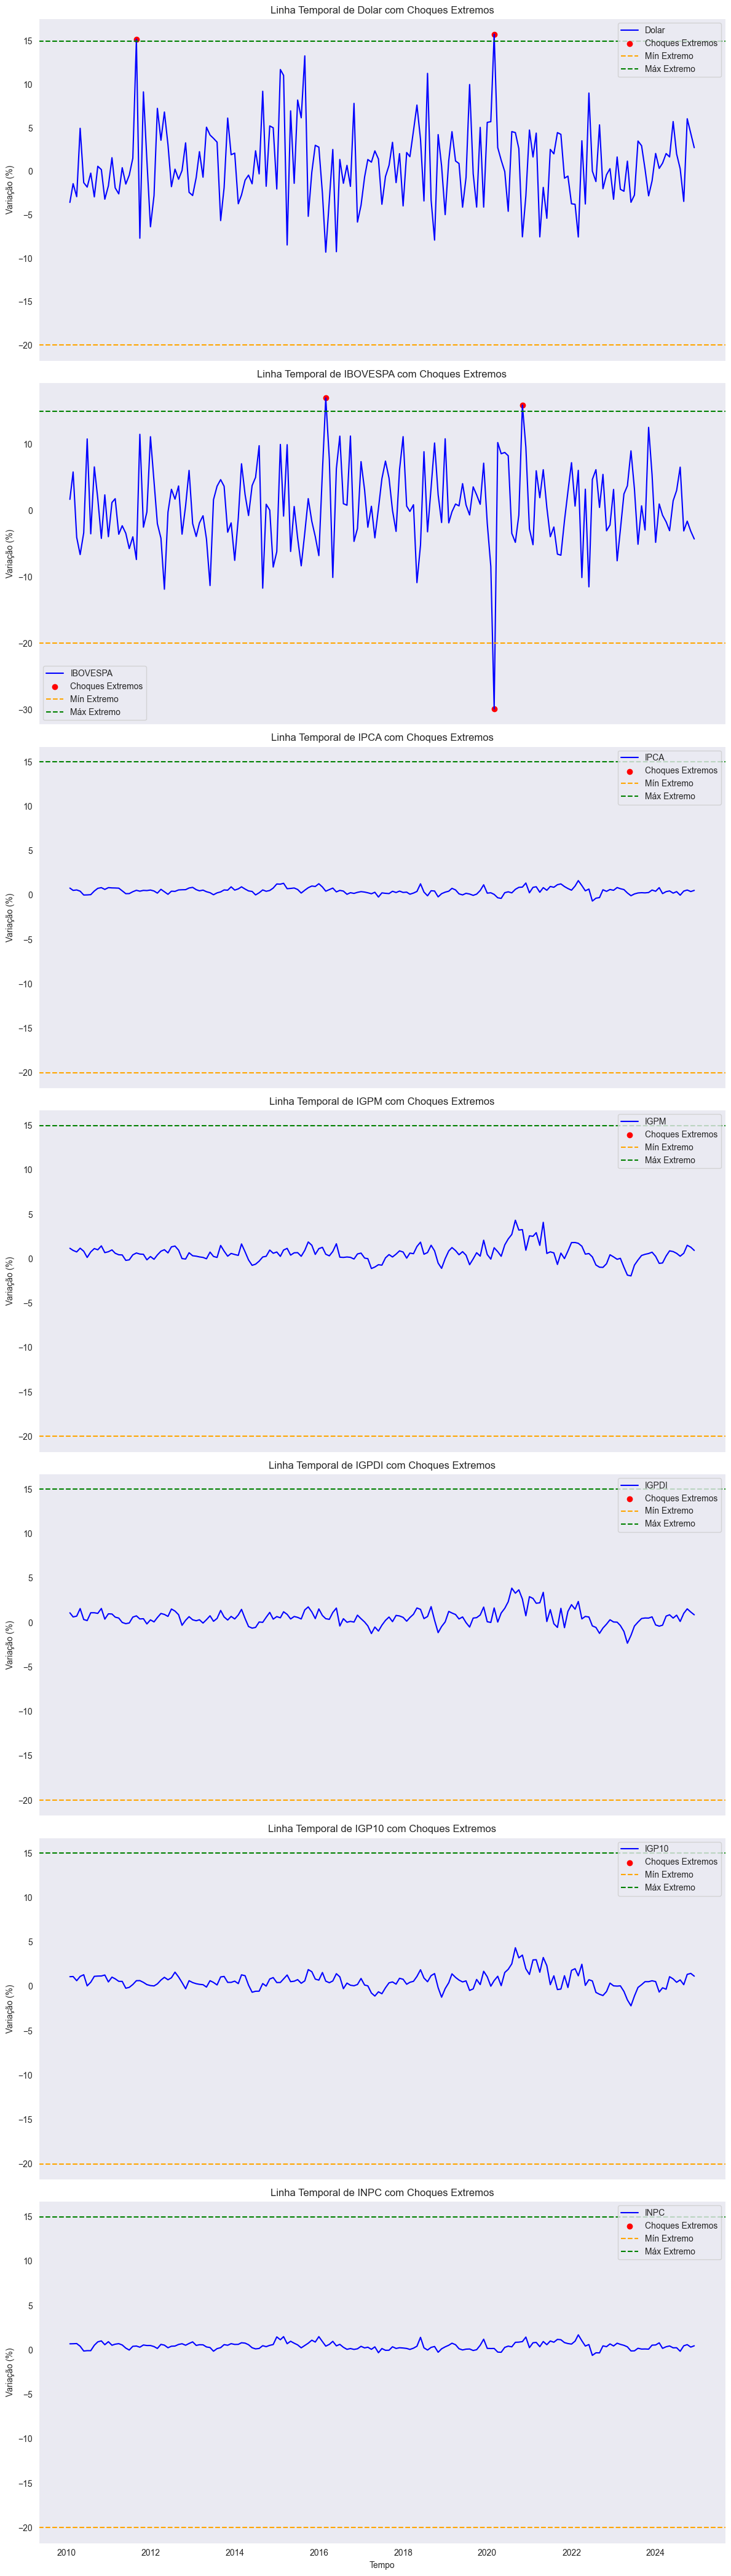

In [24]:
import matplotlib.pyplot as plt

# Define os valores de altas e baixas extremas
valor_min_extremo = -20
valor_max_extremo = 15

# Cria uma figura com múltiplos subplots (um para cada coluna)
fig, axes = plt.subplots(len(df.columns), 1, figsize=(12, 6 * len(df.columns)), sharex=True)

# Loop pelos dados de todas as colunas
for i, col in enumerate(df.columns):
    # Filtra os índices dos choques extremos
    extremos = df[(df[col] <= valor_min_extremo) | (df[col] >= valor_max_extremo)]

    # Configuração de cada subplot
    axes[i].plot(df.index, df[col], label=col, color='blue')
    axes[i].scatter(extremos.index, extremos[col], color='red', label='Choques Extremos')
    axes[i].axhline(valor_min_extremo, color='orange', linestyle='--', label='Mín Extremo')
    axes[i].axhline(valor_max_extremo, color='green', linestyle='--', label='Máx Extremo')
    axes[i].set_title(f'Linha Temporal de {col} com Choques Extremos')
    axes[i].set_ylabel('Variação (%)')
    axes[i].legend()
    axes[i].grid()

# Configurações finais da figura
axes[-1].set_xlabel('Tempo')  # Define o rótulo do eixo X no último subplot
plt.tight_layout()  # Ajusta os subplots para não sobrepor
plt.show()

✔ Séries temporais

Dólar e IBOV: múltiplos choques extremos claros, típicos de crise (ex.: COVID, eleições).

IPCA, INPC: estabilidade total.

IGPs: choques em 2020‑21 (inflação de atacado), reforçando necessidade de dummy futura.

✔ Correlações com lags (dólar → variáveis)


Série	Correlação máx (lag)
IBOVESPA	–0.61 (lag 0) → imediato, forte e negativo
IPCA	+0.19 (lag 4) → leve e atrasado
IGPM	+0.19 (lag 4)
IGPDI	+0.23 (lag 4)
IGP10	+0.19 (lag 4)
INPC	+0.22 (lag 8)

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss

# Verifica a estacionariedade com ADF e KPSS
def verifica_estacionariedade(serie, alpha=0.05):
    resultado_adf = adfuller(serie.dropna())
    resultado_kpss = kpss(serie.dropna(), regression='c')
    return {
        'ADF': 'Estacionária' if resultado_adf[1] < alpha else 'Não estacionária',
        'KPSS': 'Estacionária' if resultado_kpss[1] > alpha else 'Não estacionária'
    }

resultados_estacionariedade = {col: verifica_estacionariedade(df[col]) for col in df.columns}

# Imprime os resultados no formato de texto
for serie, resultado in resultados_estacionariedade.items():
    print(f"Série: {serie} - ADF: {resultado['ADF']} - KPSS: {resultado['KPSS']}")

Série: Dolar - ADF: Estacionária - KPSS: Estacionária
Série: IBOVESPA - ADF: Estacionária - KPSS: Estacionária
Série: IPCA - ADF: Estacionária - KPSS: Estacionária
Série: IGPM - ADF: Estacionária - KPSS: Estacionária
Série: IGPDI - ADF: Estacionária - KPSS: Estacionária
Série: IGP10 - ADF: Estacionária - KPSS: Estacionária
Série: INPC - ADF: Estacionária - KPSS: Estacionária


C:\Users\fabio\AppData\Local\Temp\ipykernel_27156\3020874406.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie.dropna(), regression='c')
C:\Users\fabio\AppData\Local\Temp\ipykernel_27156\3020874406.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie.dropna(), regression='c')
C:\Users\fabio\AppData\Local\Temp\ipykernel_27156\3020874406.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(serie.dropna(), regression='c')
C:\Users\fabio\AppData\Local\Temp\ipykernel_27156\3020874406.py:6: InterpolationWarning: The test statistic is outside of the rang

Série: Dolar - ADF: Estacionária - KPSS: Estacionária

Série: IBOVESPA - ADF: Estacionária - KPSS: Estacionária

Série: IPCA - ADF: Estacionária - KPSS: Estacionária

Série: IGPM - ADF: Estacionária - KPSS: Estacionária

Série: IGPDI - ADF: Estacionária - KPSS: Estacionária

Série: IGP10 - ADF: Estacionária - KPSS: Estacionária

Série: INPC - ADF: Estacionária - KPSS: Estacionária

In [26]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def verifica_cointegracao(df, pairs):
    resultados = {}
    for pair in pairs:
        df_pair = df[list(pair)].dropna().astype(float)

        # Seleção de lag via AIC
        lag_order = VAR(df_pair).select_order(12).selected_orders['aic']
        k_ar_diff = max(lag_order - 1, 1)

        # Teste de Johansen
        johansen_test = coint_johansen(df_pair, det_order=0, k_ar_diff=k_ar_diff)

        # Verificação de significância a 5%
        significance_index = 1  # 5% está na posição 1
        trace_result = any(johansen_test.lr1 > johansen_test.cvt[:, significance_index])
        maxeig_result = any(johansen_test.lr2 > johansen_test.cvm[:, significance_index])

        resultados[pair] = {
            'Trace Test': trace_result,
            'Max Eigenvalue Test': maxeig_result
        }

    return resultados

# Pares a testar
pairs = [
    ('Dolar', 'IBOVESPA'),
    ('Dolar', 'IPCA'),
    ('Dolar', 'IGPM'),
    ('Dolar', 'IGPDI'),
    ('Dolar', 'IGP10'),
    ('Dolar', 'INPC')
]

# Executa
resultados_cointegracao = verifica_cointegracao(df, pairs)
for pair, resultado in resultados_cointegracao.items():
    print(f"Par: {pair} - Traço: {'Cointegração' if resultado['Trace Test'] else 'Sem cointegração'}, "
          f"Máx AutoValor: {'Cointegração' if resultado['Max Eigenvalue Test'] else 'Sem cointegração'}")

Par: ('Dolar', 'IBOVESPA') - Traço: Cointegração, Máx AutoValor: Cointegração
Par: ('Dolar', 'IPCA') - Traço: Cointegração, Máx AutoValor: Cointegração
Par: ('Dolar', 'IGPM') - Traço: Cointegração, Máx AutoValor: Cointegração
Par: ('Dolar', 'IGPDI') - Traço: Cointegração, Máx AutoValor: Cointegração
Par: ('Dolar', 'IGP10') - Traço: Cointegração, Máx AutoValor: Cointegração
Par: ('Dolar', 'INPC') - Traço: Cointegração, Máx AutoValor: Cointegração


D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [27]:
from statsmodels.tsa.api import VECM

# Ajuste de VECM para cada par com o dólar
vecm_resultados = {}
for pair in pairs:
    df_pair = df[list(pair)].dropna().astype(float)

    # Seleção de lag via AIC
    lag_order = VAR(df_pair).select_order(12).selected_orders['aic']
    k_ar_diff = max(lag_order - 1, 1)

    # Ajuste do modelo VECM
    vecm_model = VECM(df_pair, k_ar_diff=k_ar_diff, coint_rank=1, deterministic='co')
    vecm_fit = vecm_model.fit()

    # Armazena os resultados
    vecm_resultados[pair] = vecm_fit.summary()

# Mostra os resultados
for pair, summary in vecm_resultados.items():
    print(f"Par: {pair}\n{summary}")

Par: ('Dolar', 'IBOVESPA')
Det. terms outside the coint. relation & lagged endog. parameters for equation Dolar
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1494      0.422     -0.354      0.723      -0.977       0.678
L1.Dolar       -0.5708      0.083     -6.898      0.000      -0.733      -0.409
L1.IBOVESPA    -0.1007      0.082     -1.229      0.219      -0.261       0.060
Det. terms outside the coint. relation & lagged endog. parameters for equation IBOVESPA
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0273      0.488      2.104      0.035       0.070       1.984
L1.Dolar        0.2283      0.096      2.385      0.017       0.041       0.416
L1.IBOVESPA     0.1928      0.095      2.035      0.042       0.007       0.379


D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Par: ('Dolar', 'IGPDI')
Det. terms outside the coint. relation & lagged endog. parameters for equation Dolar
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4382      0.348      1.260      0.208      -0.243       1.120
L1.Dolar      -0.1582      0.218     -0.725      0.469      -0.586       0.270
L1.IGPDI      -0.7308      0.488     -1.499      0.134      -1.686       0.225
L2.Dolar      -0.0795      0.207     -0.384      0.701      -0.486       0.326
L2.IGPDI      -0.5474      0.514     -1.066      0.287      -1.554       0.459
L3.Dolar      -0.0701      0.187     -0.374      0.708      -0.437       0.297
L3.IGPDI      -0.0108      0.528     -0.020      0.984      -1.046       1.024
L4.Dolar      -0.1094      0.166     -0.659      0.510      -0.435       0.216
L4.IGPDI      -0.4863      0.503     -0.968      0.333      -1.471       0.499
L5.Dolar      -0.0919 

| Variável | Correção ECM | Efeito de curto prazo |  Modelo útil?
|---|---|---|---|
| IBOV  | ✅ Forte  | ✅ Significativo  | 	Sim  |
| IPCA  | ❌ Nulo  | ❌ Nulo  | 	Não  |
| IGPM  | ⚠️ Fraco  | ❌ Quase irrelevante  | 	Limitado  |
| IGPDI  | 	✅ Claro  | ✅ Longo e fracionado  | 	Sim  |
| IGP10  | 	✅ Claro  | ✅ Longo e fracionado  | 	Sim  |
| INPC  | 	❌ Nulo  | 	❌ Nulo  | 	Não  |

✅ IBOVESPA
ec1 (IBOV): –0.5542 (p < 0.001)
→ Alta significância: IBOV corrige rapidamente desvios com relação ao dólar.

Coef lag dólar → IBOV: +0.2283 (p = 0.017)
→ Dólar influencia o IBOV positivamente no mês seguinte (!). Resultado contraintuitivo, mas significativo.

Conclusão: Correção forte e rápida. Dólar tem efeito de curto e longo prazo.

❌ IPCA
ec1 (IPCA): –0.0043 (p = 0.58)
→ Sem significância: IPCA não reage a desvios do equilíbrio com o dólar.

Coef lag dólar: ~0 (p > 0.9)
→ Sem efeito de curto prazo também.

Conclusão: Apesar da cointegração estatística, não há dinâmica real detectável. Modelo irrelevante.

⚠️ IGP-M
ec1 (IGPM): +0.0450 (p = 0.008)
→ Pequena, mas significativa. Correção positiva → precisa ser interpretado com cuidado.

Lag IGPM: –0.2605 (p < 0.001)
→ Forte autocorrelação.

Conclusão: Dólar tem relação fraca, mas significativa com o IGPM. Precisa ver IRF.

⚠️ IGP-DI
ec1 (IGPDI): +0.1344 (p < 0.001)
→ Correção presente.

Lag dólar: significativos até lag 6 → influência prolongada.

Conclusão: Dólar tem impacto distribuído no IGP-DI; efeito de longo prazo detectável.

⚠️ IGP-10
ec1 (IGP10): +0.1311 (p < 0.001)
→ Correção presente.

Lag dólar: significativos até lag 6 também.

Conclusão: Mesmo padrão de IGPDI. Impacto do dólar é persistente e acumulativo.

❌ INPC
ec1 (INPC): –0.0046 (p = 0.58)
→ Sem significância.

Lag dólar: todos p > 0.6

Conclusão: INPC se move sozinho, sem influência detectável do dólar.



D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


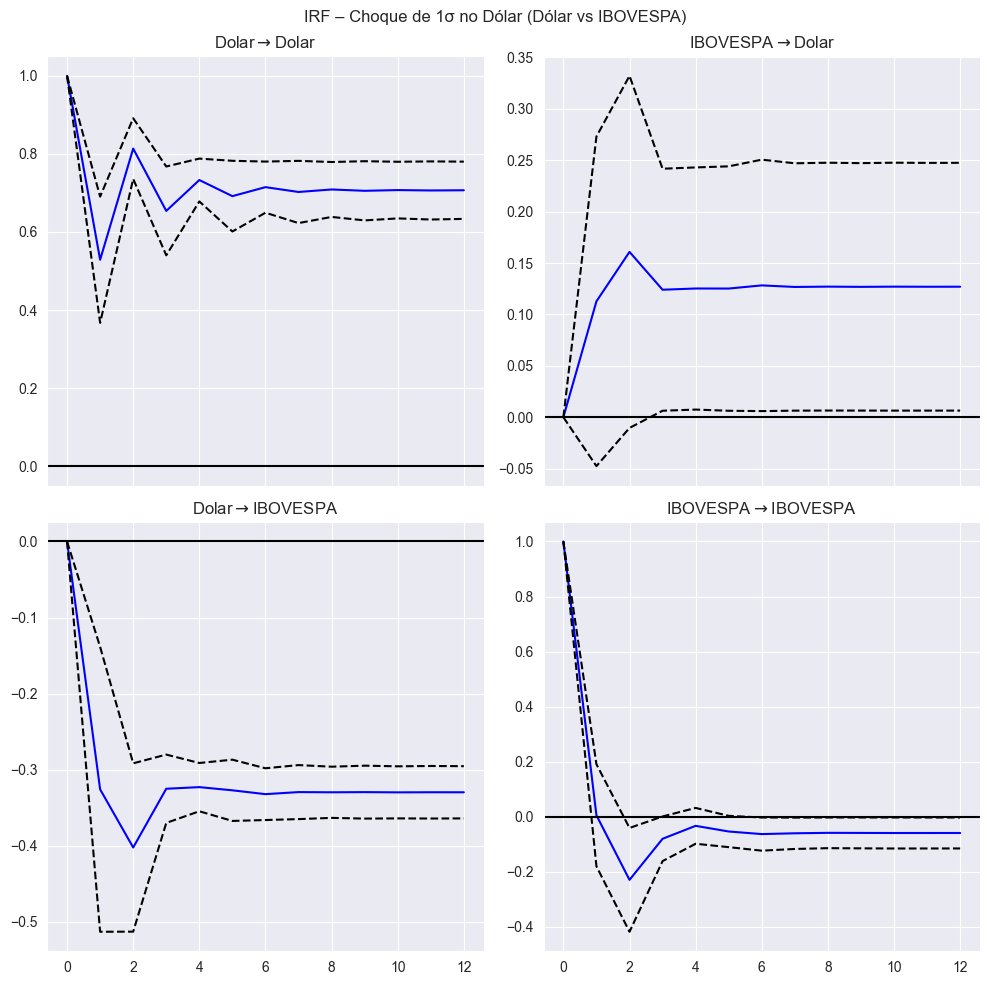

In [28]:
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt

# Dados
df_par = df[['Dolar', 'IBOVESPA']].dropna().astype(float)

# Lag ótimo (use o que já calculou antes)
from statsmodels.tsa.api import VAR
lag = VAR(df_par).select_order(12).selected_orders['aic']
k_ar_diff = max(lag - 1, 1)

# Ajusta VECM
vecm_model = VECM(df_par, k_ar_diff=k_ar_diff, coint_rank=1, deterministic='co')
vecm_fit = vecm_model.fit()

# IRF
irf = vecm_fit.irf(12)  # 12 meses
irf.plot(orth=False)
plt.suptitle('IRF – Choque de 1σ no Dólar (Dólar vs IBOVESPA)')
plt.tight_layout()
plt.show()

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


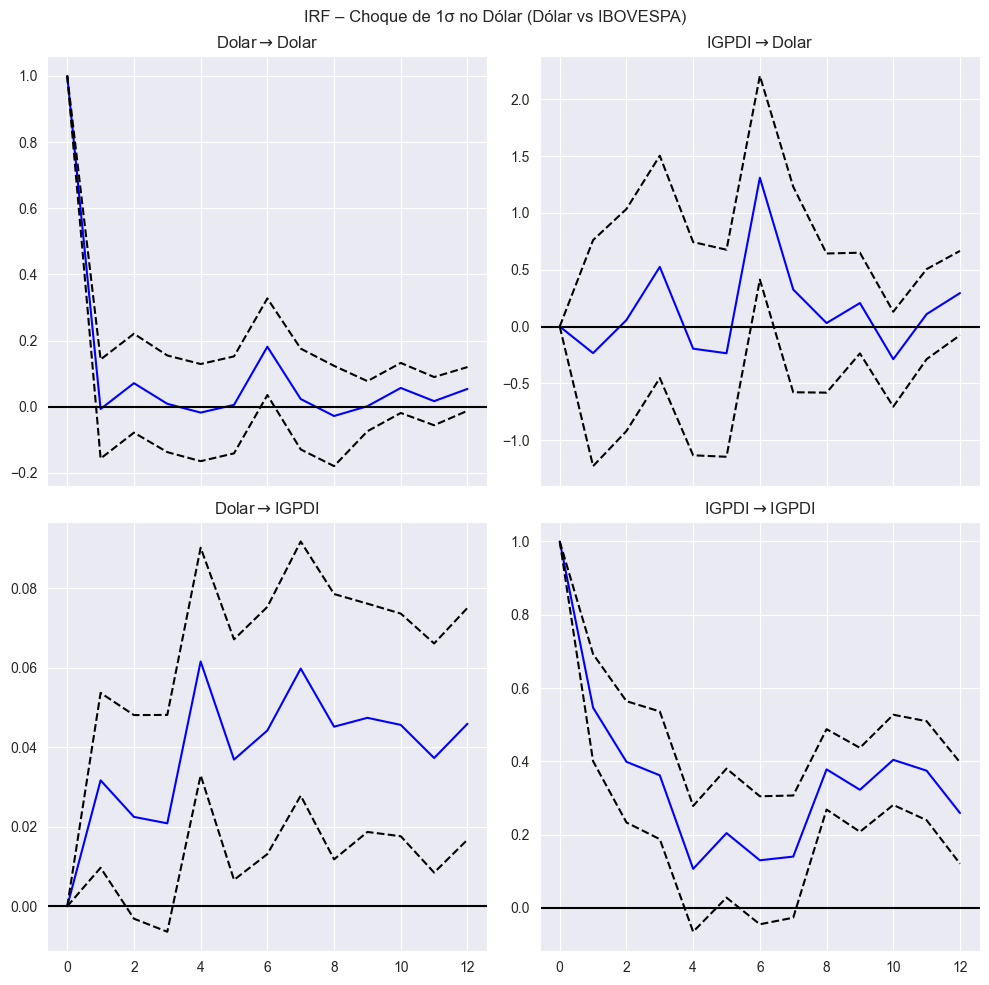

In [29]:
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt

# Dados
df_par = df[['Dolar', 'IGPDI']].dropna().astype(float)

# Lag ótimo (use o que já calculou antes)
from statsmodels.tsa.api import VAR
lag = VAR(df_par).select_order(12).selected_orders['aic']
k_ar_diff = max(lag - 1, 1)

# Ajusta VECM
vecm_model = VECM(df_par, k_ar_diff=k_ar_diff, coint_rank=1, deterministic='co')
vecm_fit = vecm_model.fit()

# IRF
irf = vecm_fit.irf(12)  # 12 meses
irf.plot(orth=False)
plt.suptitle('IRF – Choque de 1σ no Dólar (Dólar vs IBOVESPA)')
plt.tight_layout()
plt.show()

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


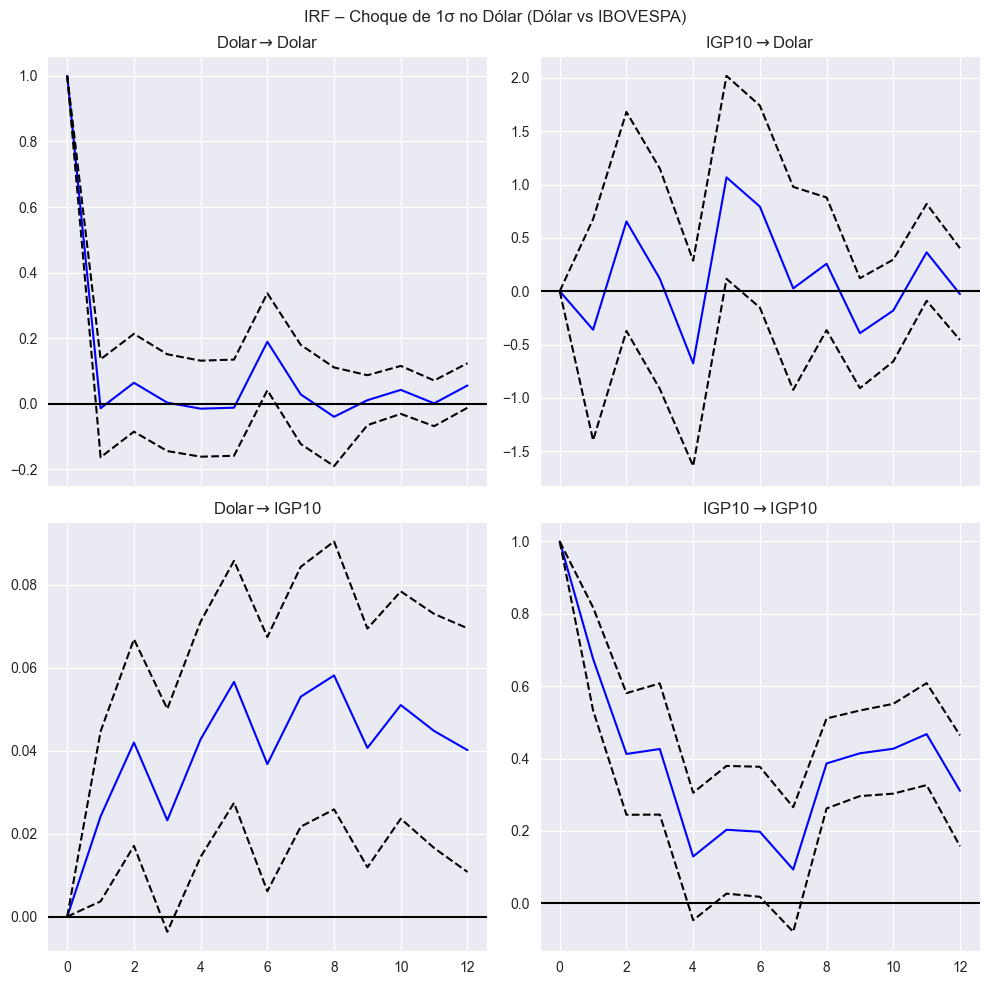

In [30]:
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt

# Dados
df_par = df[['Dolar', 'IGP10']].dropna().astype(float)

# Lag ótimo (use o que já calculou antes)
from statsmodels.tsa.api import VAR
lag = VAR(df_par).select_order(12).selected_orders['aic']
k_ar_diff = max(lag - 1, 1)

# Ajusta VECM
vecm_model = VECM(df_par, k_ar_diff=k_ar_diff, coint_rank=1, deterministic='co')
vecm_fit = vecm_model.fit()

# IRF
irf = vecm_fit.irf(12)  # 12 meses
irf.plot(orth=False)
plt.suptitle('IRF – Choque de 1σ no Dólar (Dólar vs IBOVESPA)')
plt.tight_layout()
plt.show()

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


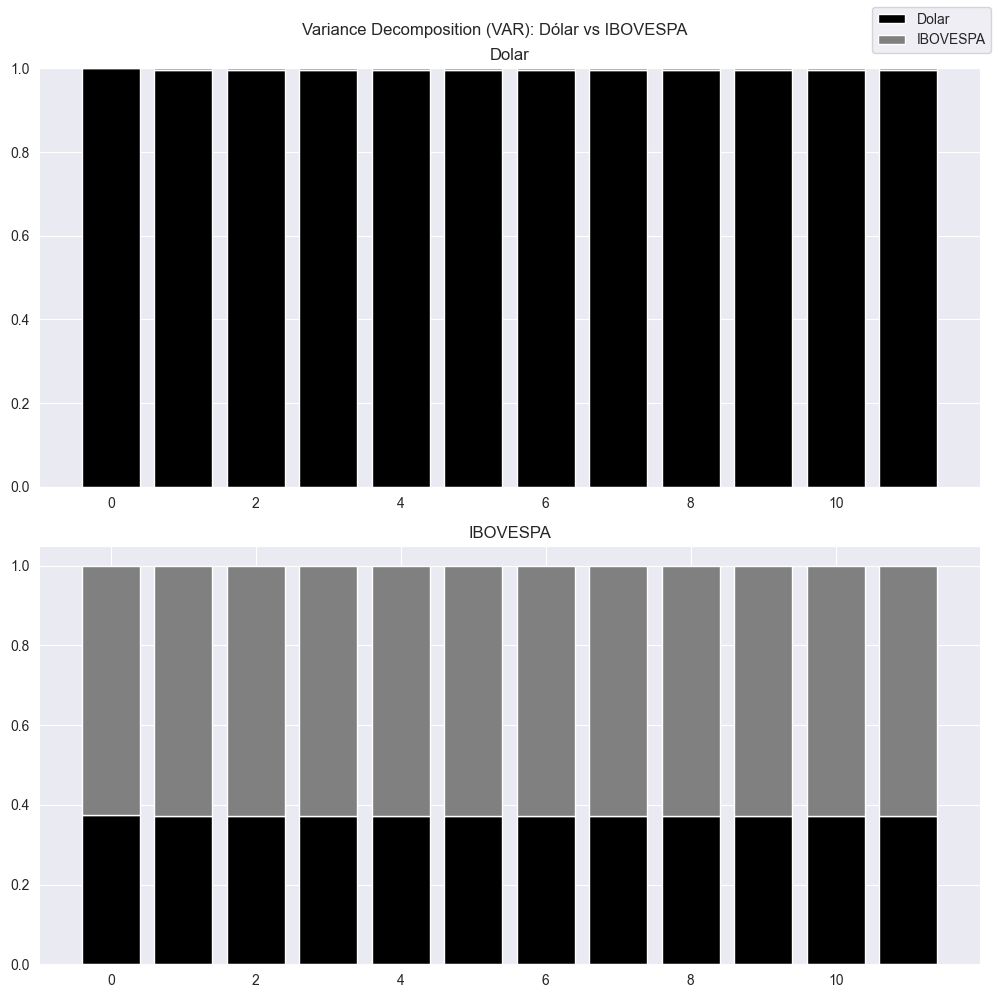

In [31]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Dados
df_par = df[['Dolar', 'IBOVESPA']].dropna().astype(float)

# Ajuste VAR com lag ótimo (AIC)
modelo_var = VAR(df_par)
lag_otimo = modelo_var.select_order(12).selected_orders['aic']
lag_otimo = max(lag_otimo, 1)  # garante mínimo 1 lag

var_resultado = modelo_var.fit(lag_otimo)

# Variance Decomposition para 12 meses
fevd = var_resultado.fevd(12)
fevd.plot()
plt.suptitle('Variance Decomposition (VAR): Dólar vs IBOVESPA')
plt.tight_layout()
plt.show()

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


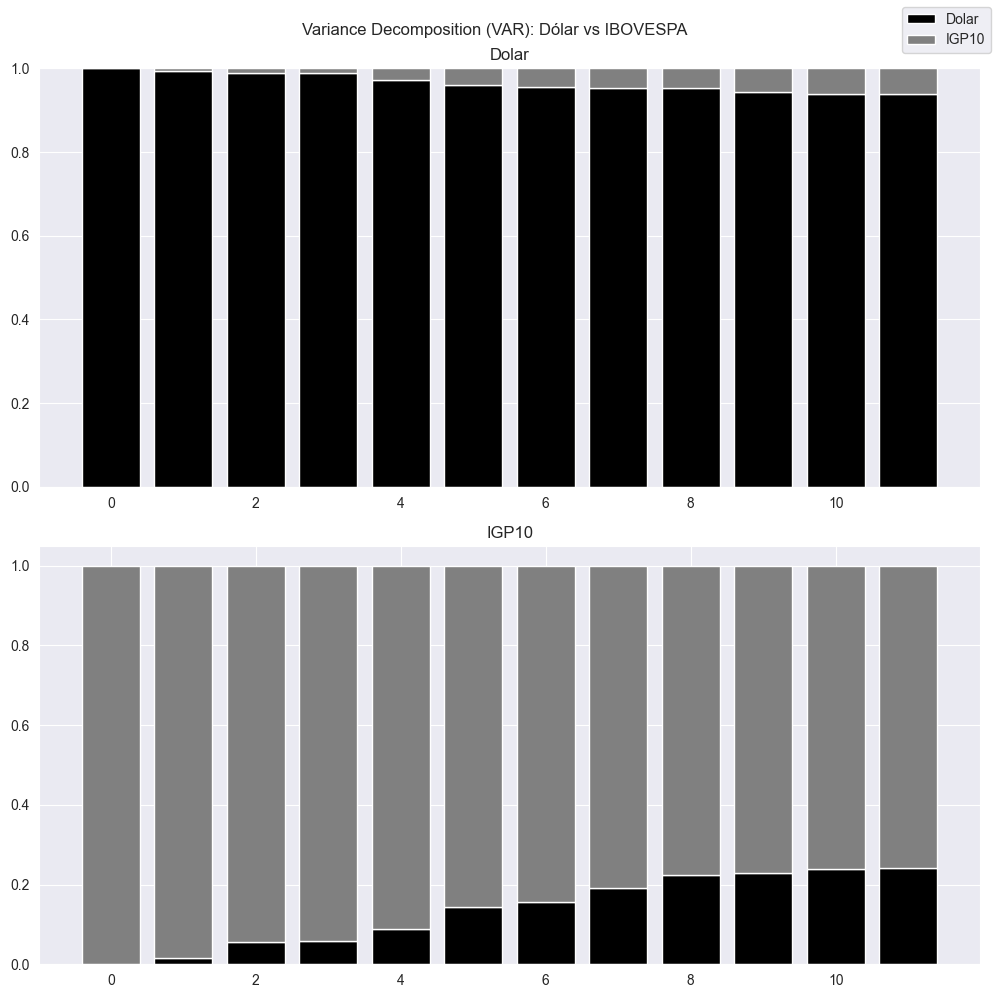

In [32]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Dados
df_par = df[['Dolar', 'IGP10']].dropna().astype(float)

# Ajuste VAR com lag ótimo (AIC)
modelo_var = VAR(df_par)
lag_otimo = modelo_var.select_order(12).selected_orders['aic']
lag_otimo = max(lag_otimo, 1)  # garante mínimo 1 lag

var_resultado = modelo_var.fit(lag_otimo)

# Variance Decomposition para 12 meses
fevd = var_resultado.fevd(12)
fevd.plot()
plt.suptitle('Variance Decomposition (VAR): Dólar vs IBOVESPA')
plt.tight_layout()
plt.show()

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


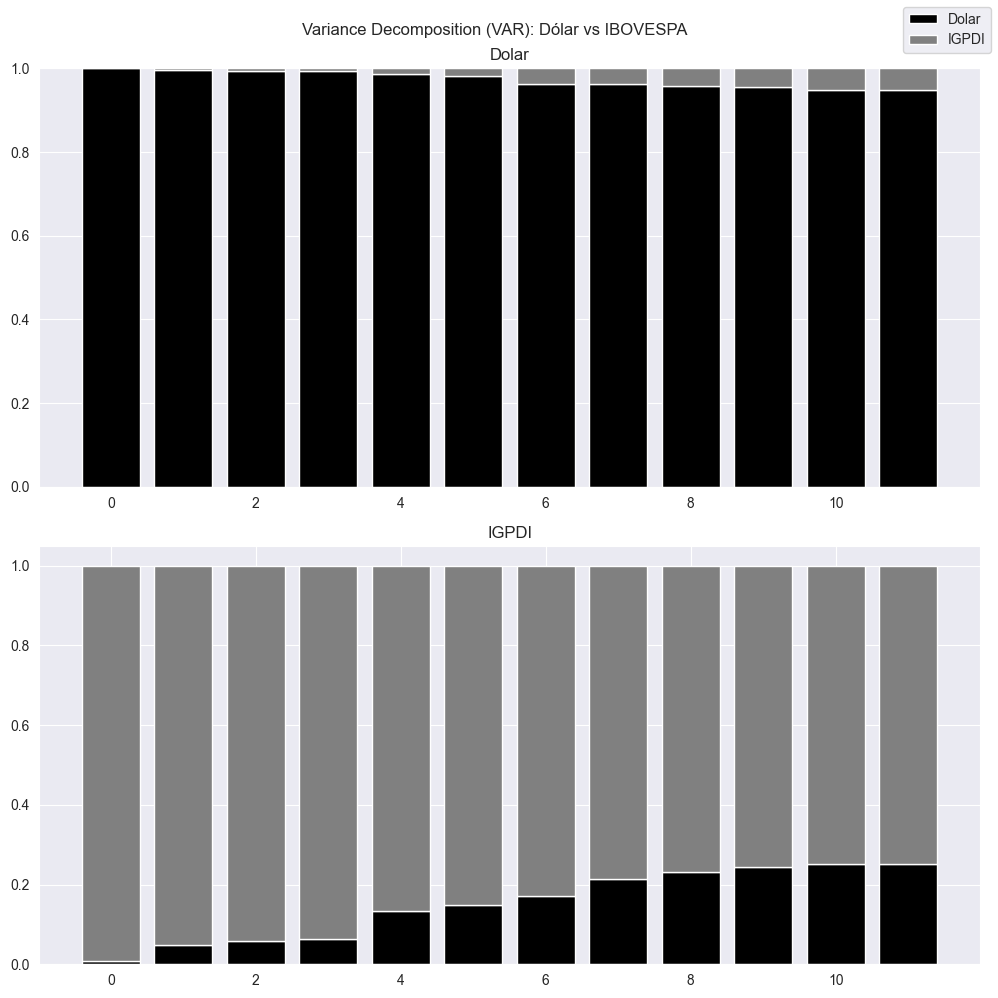

In [33]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Dados
df_par = df[['Dolar', 'IGPDI']].dropna().astype(float)

# Ajuste VAR com lag ótimo (AIC)
modelo_var = VAR(df_par)
lag_otimo = modelo_var.select_order(12).selected_orders['aic']
lag_otimo = max(lag_otimo, 1)  # garante mínimo 1 lag

var_resultado = modelo_var.fit(lag_otimo)

# Variance Decomposition para 12 meses
fevd = var_resultado.fevd(12)
fevd.plot()
plt.suptitle('Variance Decomposition (VAR): Dólar vs IBOVESPA')
plt.tight_layout()
plt.show()